# Linear Regression model Section 2
## capitalbikeshare-data [DATA]

# Model 1: Predict Trip Duration (Regression)

### importing requred libraries


In [463]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [464]:
import pandas as pd
file_path  = r"C:\Users\Ravichandran\OneDrive\Desktop\202504-capitalbikeshare-tripdata.csv"
bike_data = pd.read_csv(file_path)
bike_data = bike_data.copy() # for prevent data if any crashes



In [465]:
bike_data.info()
bike_data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 664199 entries, 0 to 664198
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             664199 non-null  object 
 1   rideable_type       664199 non-null  object 
 2   started_at          664199 non-null  object 
 3   ended_at            664199 non-null  object 
 4   start_station_name  484161 non-null  object 
 5   start_station_id    484161 non-null  float64
 6   end_station_name    480151 non-null  object 
 7   end_station_id      480014 non-null  float64
 8   start_lat           664199 non-null  float64
 9   start_lng           664199 non-null  float64
 10  end_lat             663797 non-null  float64
 11  end_lng             663797 non-null  float64
 12  member_casual       664199 non-null  object 
dtypes: float64(6), object(7)
memory usage: 65.9+ MB


(664199, 13)

In [466]:
bike_data

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,75DE4C13E12A8120,electric_bike,2025-04-16 13:53:26.609,2025-04-16 13:59:29.037,NaN,NaN,NaN,NaN,38.950000,-77.000000,38.95,-77.01,member
1,5F0A0C76E46B6598,electric_bike,2025-04-16 13:50:09.858,2025-04-16 13:51:44.805,NaN,NaN,NaN,NaN,38.910000,-76.930000,38.91,-76.93,member
2,F21CA3561020E5CB,electric_bike,2025-04-16 06:07:53.390,2025-04-16 06:12:37.594,NaN,NaN,NaN,NaN,38.930000,-77.030000,38.93,-77.04,member
3,77BA2B864CB907B1,electric_bike,2025-04-15 22:41:39.628,2025-04-15 22:59:10.348,NaN,NaN,NaN,NaN,38.960000,-77.020000,38.96,-77.02,member
4,1FE0D03712EA61E6,electric_bike,2025-04-16 19:55:16.580,2025-04-16 20:28:20.207,NaN,NaN,NaN,NaN,38.960000,-77.020000,38.87,-77.01,member
...,...,...,...,...,...,...,...,...,...,...,...,...,...
664194,394DE2C0FAC755E7,electric_bike,2025-04-01 08:08:29.708,2025-04-01 08:20:48.121,16th St & North Carolina Ave NE,31725.0,NaN,NaN,38.893068,-76.982507,38.89,-77.02,member
664195,8B17985AE49F66E1,electric_bike,2025-04-01 08:11:37.825,2025-04-01 08:19:41.434,Arlington Blvd & S George Mason Dr,31078.0,NaN,NaN,38.869442,-77.104503,38.89,-77.11,member
664196,61E5BE18E664C945,electric_bike,2025-04-09 08:10:22.244,2025-04-09 08:19:41.996,Arlington Blvd & S George Mason Dr,31078.0,NaN,NaN,38.869442,-77.104503,38.89,-77.11,member
664197,F275A9CAD7155111,electric_bike,2025-04-20 10:32:18.696,2025-04-20 10:38:01.986,Chillum Rd & Riggs Rd / Riggs Plaza,32416.0,NaN,NaN,38.961746,-76.995908,38.95,-77.00,member


In [467]:
bike_data.columns.tolist()

['ride_id',
 'rideable_type',
 'started_at',
 'ended_at',
 'start_station_name',
 'start_station_id',
 'end_station_name',
 'end_station_id',
 'start_lat',
 'start_lng',
 'end_lat',
 'end_lng',
 'member_casual']

In [468]:
bike_data.isnull().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    180038
start_station_id      180038
end_station_name      184048
end_station_id        184185
start_lat                  0
start_lng                  0
end_lat                  402
end_lng                  402
member_casual              0
dtype: int64

# droping null valuse

In [469]:
bike_data.drop(['start_station_name','start_station_id','end_station_name','end_station_id','ride_id'], axis=1, inplace=True)

In [470]:
bike_data

,rideable_type,started_at,ended_at,start_lat,start_lng,end_lat,end_lng,member_casual
0,electric_bike,2025-04-16 13:53:26.609,2025-04-16 13:59:29.037,38.950000,-77.000000,38.95,-77.01,member
1,electric_bike,2025-04-16 13:50:09.858,2025-04-16 13:51:44.805,38.910000,-76.930000,38.91,-76.93,member
2,electric_bike,2025-04-16 06:07:53.390,2025-04-16 06:12:37.594,38.930000,-77.030000,38.93,-77.04,member
3,electric_bike,2025-04-15 22:41:39.628,2025-04-15 22:59:10.348,38.960000,-77.020000,38.96,-77.02,member
4,electric_bike,2025-04-16 19:55:16.580,2025-04-16 20:28:20.207,38.960000,-77.020000,38.87,-77.01,member
...,...,...,...,...,...,...,...,...
664194,electric_bike,2025-04-01 08:08:29.708,2025-04-01 08:20:48.121,38.893068,-76.982507,38.89,-77.02,member
664195,electric_bike,2025-04-01 08:11:37.825,2025-04-01 08:19:41.434,38.869442,-77.104503,38.89,-77.11,member
664196,electric_bike,2025-04-09 08:10:22.244,2025-04-09 08:19:41.996,38.869442,-77.104503,38.89,-77.11,member
664197,electric_bike,2025-04-20 10:32:18.696,2025-04-20 10:38:01.986,38.961746,-76.995908,38.95,-77.00,member


In [471]:
bike_data.describe()

,start_lat,start_lng,end_lat,end_lng
count,664199.000000,664199.000000,663797.000000,663797.000000
mean,38.904722,-77.034301,38.904137,-77.034083
std,0.031364,0.039284,0.031351,0.039277
min,38.760000,-77.389696,38.710000,-77.390000
25%,38.890000,-77.047318,38.890000,-77.047318
50%,38.903967,-77.030000,38.903732,-77.030000
75%,38.920000,-77.011987,38.919018,-77.011616
max,39.125875,-76.810000,39.125828,-76.760000


## filling Missing values

In [472]:
bike_data['end_lat'] = bike_data['end_lat'].fillna(bike_data['end_lat'].median()) # median gives realistic coordinates that won't break analysis
bike_data['end_lng'] = bike_data['end_lng'].fillna(bike_data['end_lng'].median())

In [473]:
bike_data['end_lng'].isnull()
bike_data['end_lat'].isnull() # checking results

0         False
1         False
2         False
3         False
4         False
          ...  
664194    False
664195    False
664196    False
664197    False
664198    False
Name: end_lat, Length: 664199, dtype: bool

In [474]:
bike_data['started_at'] = pd.to_datetime(bike_data['started_at'], format='%Y-%m-%d %H:%M:%S.%f', errors='coerce') #converting string to datetime format.
bike_data['ended_at'] = pd.to_datetime(bike_data['ended_at'], format='%Y-%m-%d %H:%M:%S.%f', errors='coerce')

In [475]:
bike_data['trip_duration'] = (bike_data['ended_at'] - bike_data['started_at']).dt.total_seconds() / 60 # Calculate trip duration 

In [476]:
y = bike_data['trip_duration'] # testing ist its working or not ##-> for traning
print(y[:50])

0      6.040467
1      1.582450
2      4.736733
3     17.512000
4     33.060450
5     40.261533
6      2.401483
7      5.425483
8     10.797017
9     21.149183
10    54.981767
11    17.327050
12     3.274233
13     2.465600
14     7.290000
15    16.832033
16     6.110650
17     7.841717
18     1.010667
19     2.228567
20     2.917783
21    30.909900
22     0.431617
23    19.009450
24     1.591900
25    16.684900
26    35.759733
27    13.115017
28    19.319017
29     5.000667
30    22.257100
31    34.806183
32     5.726817
33     0.243100
34     8.296283
35     0.265867
36     9.062517
37    48.615950
38     6.521400
39     3.411033
40    11.160917
41     4.340717
42    12.070633
43     2.985983
44    12.879583
45     7.514567
46    14.661783
47     3.956633
48     2.398833
49     9.309683
Name: trip_duration, dtype: float64


In [477]:
# Trips under 5 minutes:

short_trips = bike_data[bike_data['trip_duration'] < 5]
print(f"Trips under 5 mins: {len(short_trips)}")
# Trips over 30 minutes:

long_trips = bike_data[bike_data['trip_duration'] > 30]
print(f"Trips over 30 mins: {len(long_trips)}")

Trips under 5 mins: 147433
Trips over 30 mins: 68508


In [478]:
# Removing  unrealistic trips for better performance
bike_data = bike_data[
    (bike_data['trip_duration'] > 1) &      # Removing  <1 minute 
    (bike_data['trip_duration'] <50 )      # Removing >2 hours 
]

In [479]:
bike_data

,rideable_type,started_at,ended_at,start_lat,start_lng,end_lat,end_lng,member_casual,trip_duration
0,electric_bike,2025-04-16 13:53:26.609,2025-04-16 13:59:29.037,38.950000,-77.000000,38.95,-77.01,member,6.040467
1,electric_bike,2025-04-16 13:50:09.858,2025-04-16 13:51:44.805,38.910000,-76.930000,38.91,-76.93,member,1.582450
2,electric_bike,2025-04-16 06:07:53.390,2025-04-16 06:12:37.594,38.930000,-77.030000,38.93,-77.04,member,4.736733
3,electric_bike,2025-04-15 22:41:39.628,2025-04-15 22:59:10.348,38.960000,-77.020000,38.96,-77.02,member,17.512000
4,electric_bike,2025-04-16 19:55:16.580,2025-04-16 20:28:20.207,38.960000,-77.020000,38.87,-77.01,member,33.060450
...,...,...,...,...,...,...,...,...,...
664194,electric_bike,2025-04-01 08:08:29.708,2025-04-01 08:20:48.121,38.893068,-76.982507,38.89,-77.02,member,12.306883
664195,electric_bike,2025-04-01 08:11:37.825,2025-04-01 08:19:41.434,38.869442,-77.104503,38.89,-77.11,member,8.060150
664196,electric_bike,2025-04-09 08:10:22.244,2025-04-09 08:19:41.996,38.869442,-77.104503,38.89,-77.11,member,9.329200
664197,electric_bike,2025-04-20 10:32:18.696,2025-04-20 10:38:01.986,38.961746,-76.995908,38.95,-77.00,member,5.721500


In [480]:

#### Converting datetime for start_at
bike_data['start_day'] = pd.to_datetime(bike_data['started_at']).dt.day        # Day number (1-31)
bike_data['start_month'] = pd.to_datetime(bike_data['started_at']).dt.month    # Month number (1-12)
bike_data['start_Hour'] = pd.to_datetime(bike_data['started_at']).dt.hour      # Hour (0-23) 
bike_data['start_weekday'] = pd.to_datetime(bike_data['started_at']).dt.weekday # Weekday (0-6) 

#### Converting datetime for ended_at  
bike_data['ended_day'] = pd.to_datetime(bike_data['ended_at']).dt.day
bike_data['ended_month'] = pd.to_datetime(bike_data['ended_at']).dt.month
bike_data['ended_Hour'] = pd.to_datetime(bike_data['ended_at']).dt.hour        
bike_data['ended_weekday'] = pd.to_datetime(bike_data['ended_at']).dt.weekday 
 
# Adding  time-based features

bike_data['is_weekend'] = bike_data['start_weekday'].isin([5, 6])
bike_data['is_rush_hour'] = bike_data['start_Hour'].isin([7, 8, 9, 17, 18, 19])


In [481]:
import numpy as np

def haversine_distance(lat1, lng1, lat2, lng2):
    R = 6371  # Earth radius in kilometers
    phi1 = np.radians(lat1)
    phi2 = np.radians(lat2)
    d_phi = np.radians(lat2 - lat1)
    d_lambda = np.radians(lng2 - lng1)

    a = np.sin(d_phi / 2.0) ** 2 + \
        np.cos(phi1) * np.cos(phi2) * \
        np.sin(d_lambda / 2.0) ** 2

    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))

    return R * c

bike_data['distance_km'] = haversine_distance(bike_data['start_lat'], bike_data['start_lng'], bike_data['end_lat'], bike_data['end_lng'])


In [482]:
bike_data

,rideable_type,started_at,ended_at,start_lat,start_lng,end_lat,end_lng,member_casual,trip_duration,start_day,start_month,start_Hour,start_weekday,ended_day,ended_month,ended_Hour,ended_weekday,is_weekend,is_rush_hour,distance_km
0,electric_bike,2025-04-16 13:53:26.609,2025-04-16 13:59:29.037,38.950000,-77.000000,38.95,-77.01,member,6.040467,16,4,13,2,16,4,13,2,False,False,0.864757
1,electric_bike,2025-04-16 13:50:09.858,2025-04-16 13:51:44.805,38.910000,-76.930000,38.91,-76.93,member,1.582450,16,4,13,2,16,4,13,2,False,False,0.000000
2,electric_bike,2025-04-16 06:07:53.390,2025-04-16 06:12:37.594,38.930000,-77.030000,38.93,-77.04,member,4.736733,16,4,6,2,16,4,6,2,False,False,0.865001
3,electric_bike,2025-04-15 22:41:39.628,2025-04-15 22:59:10.348,38.960000,-77.020000,38.96,-77.02,member,17.512000,15,4,22,1,15,4,22,1,False,False,0.000000
4,electric_bike,2025-04-16 19:55:16.580,2025-04-16 20:28:20.207,38.960000,-77.020000,38.87,-77.01,member,33.060450,16,4,19,2,16,4,20,2,False,True,10.044873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
664194,electric_bike,2025-04-01 08:08:29.708,2025-04-01 08:20:48.121,38.893068,-76.982507,38.89,-77.02,member,12.306883,1,4,8,1,1,4,8,1,False,True,3.262756
664195,electric_bike,2025-04-01 08:11:37.825,2025-04-01 08:19:41.434,38.869442,-77.104503,38.89,-77.11,member,8.060150,1,4,8,1,1,4,8,1,False,True,2.334943
664196,electric_bike,2025-04-09 08:10:22.244,2025-04-09 08:19:41.996,38.869442,-77.104503,38.89,-77.11,member,9.329200,9,4,8,2,9,4,8,2,False,True,2.334943
664197,electric_bike,2025-04-20 10:32:18.696,2025-04-20 10:38:01.986,38.961746,-76.995908,38.95,-77.00,member,5.721500,20,4,10,6,20,4,10,6,True,False,1.353120


In [483]:
bike_data.drop(['started_at'], axis=1, inplace=True) # after extracting datetime remove exsisting datetime column
bike_data.drop(['ended_at'], axis=1, inplace=True)
# removing other unwanted columns
bike_data.drop(['rideable_type'], axis=1 , inplace=True) 
bike_data.drop(['member_casual'], axis=1, inplace=True)
bike_data.drop(['start_lat'],axis = 1 , inplace=True)
bike_data.drop(['start_lng'], axis = 1 , inplace=True)
bike_data.drop(['end_lat'],axis = 1 , inplace=True)
bike_data.drop(['end_lng'], axis = 1 , inplace=True)




In [484]:
bike_data

,trip_duration,start_day,start_month,start_Hour,start_weekday,ended_day,ended_month,ended_Hour,ended_weekday,is_weekend,is_rush_hour,distance_km
0,6.040467,16,4,13,2,16,4,13,2,False,False,0.864757
1,1.582450,16,4,13,2,16,4,13,2,False,False,0.000000
2,4.736733,16,4,6,2,16,4,6,2,False,False,0.865001
3,17.512000,15,4,22,1,15,4,22,1,False,False,0.000000
4,33.060450,16,4,19,2,16,4,20,2,False,True,10.044873
...,...,...,...,...,...,...,...,...,...,...,...,...
664194,12.306883,1,4,8,1,1,4,8,1,False,True,3.262756
664195,8.060150,1,4,8,1,1,4,8,1,False,True,2.334943
664196,9.329200,9,4,8,2,9,4,8,2,False,True,2.334943
664197,5.721500,20,4,10,6,20,4,10,6,True,False,1.353120


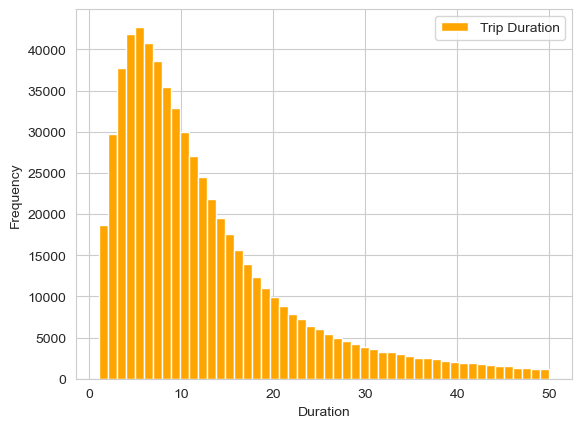

In [485]:
%matplotlib inline
label = 'trip_duration'
plt.hist(bike_data[label] , bins=50, color='orange', label='Trip Duration')
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.legend()
plt.show()


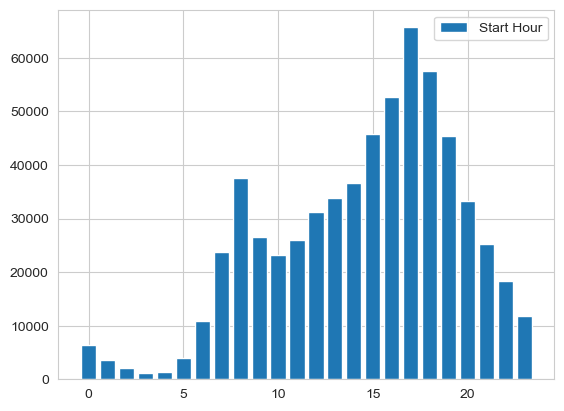

In [486]:
plt.bar(bike_data['start_Hour'].value_counts().index, bike_data['start_Hour'].value_counts().values, label='Start Hour') # Trip duration day/ hour
plt.legend()
plt.show()

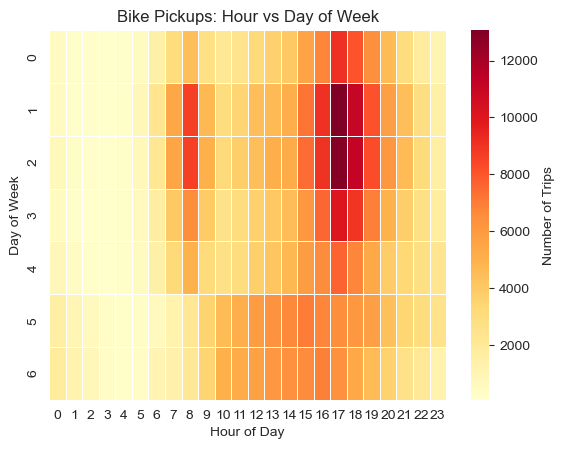

In [487]:
## showing patterns in pickup/drop-off times
heatmap_data = bike_data.groupby(['start_weekday', 'start_Hour']).size().unstack(fill_value=0) #  if values null->  fill_value=0 # unstack converts 2D array like satrt_week,start_Hour(Monday, 8AM)
plt.Figure(figsize=(15,8)) # figure size
sns.heatmap(heatmap_data, annot=False, cmap='YlOrRd', fmt='d',linewidths=0.5, cbar_kws={'label': 'Number of Trips'}) # ploting and hows nuber inside each cell
plt.title('Bike Pickups: Hour vs Day of Week')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.show()

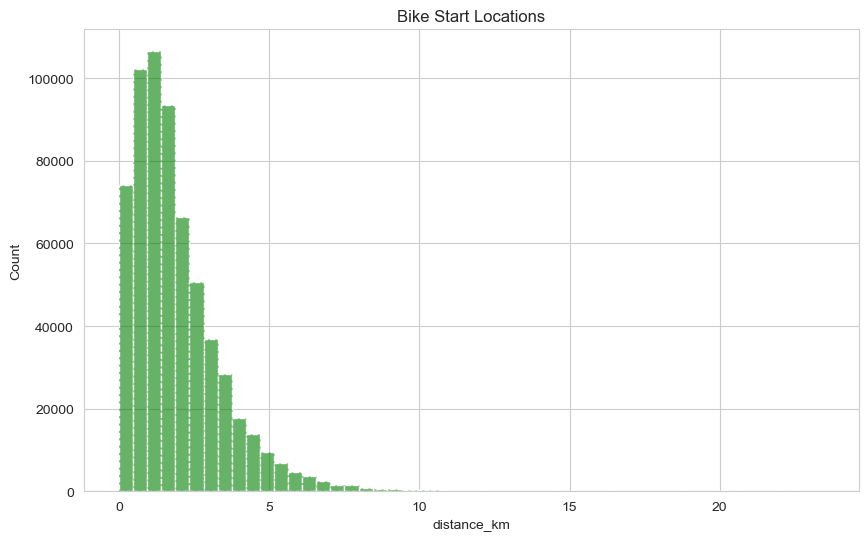

In [488]:

# Seaborn makes things automatically prettier
sns.set_style("whitegrid")  # Clean background
plt.figure(figsize=(10, 6))
sns.histplot(data = bike_data, x='distance_km', alpha=0.6, bins=50, linestyle='dashed', color='green')
plt.title('Bike Start Locations')
plt.show()

# Train a Regression model 

### ater separating the dataset, we now have numpy arrays named **X** containing the features and **y** containing the labels.

#### Befoure traing Model See what type of data you have for Regression supports numeric only
#### print(bike_data.dtypes)

In [489]:
# Separate features and labels # using 2D [[]] for Ml traing even if one future
X, y = bike_data[['ended_weekday','start_day', 'start_Hour',	'start_weekday',	'start_month',	'ended_month',	'ended_Hour','ended_day','distance_km']].values, bike_data['trip_duration'].values
print('Features:',X[:10], '\nLabels:', y[:10], sep='\n')

Features:
[[ 2.         16.         13.          2.          4.          4.
  13.         16.          0.86475722]
 [ 2.         16.         13.          2.          4.          4.
  13.         16.          0.        ]
 [ 2.         16.          6.          2.          4.          4.
   6.         16.          0.86500117]
 [ 1.         15.         22.          1.          4.          4.
  22.         15.          0.        ]
 [ 2.         16.         19.          2.          4.          4.
  20.         16.         10.04487272]
 [ 2.         16.         18.          2.          4.          4.
  19.         16.          0.        ]
 [ 2.         16.         10.          2.          4.          4.
  10.         16.          1.11194927]
 [ 1.         15.         22.          1.          4.          4.
  22.         15.          1.11194927]
 [ 2.         16.         12.          2.          4.          4.
  13.         16.          2.0556121 ]
 [ 2.         16.         12.          2.    

In [490]:

print(bike_data.dtypes)

trip_duration    float64
start_day          int32
start_month        int32
start_Hour         int32
start_weekday      int32
ended_day          int32
ended_month        int32
ended_Hour         int32
ended_weekday      int32
is_weekend          bool
is_rush_hour        bool
distance_km      float64
dtype: object


In [491]:

#  split Train and test data sets
from sklearn.model_selection import train_test_split

# Split data 90%-10% into training set and test set  becouse we have more data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))

Training Set: 561735 rows
Test Set: 62415 rows


In [492]:
# Train the model
from sklearn.linear_model import LinearRegression

# Fit a linear regression model on the training set

model = LinearRegression().fit(X_train, y_train)
print (model)

LinearRegression()


### Evaluate the Trained Model
#### make prediction of trained model

In [493]:
predictions = model.predict(X_test)
np.set_printoptions(suppress=True)
print('Predicted labels: ', np.round(predictions)[:10])
print('Actual labels   : ' ,y_test[:10])

Predicted labels:  [ 9.  8. 10.  8. 12. 10. 13. 28. 15. 21.]
Actual labels   :  [ 6.70003333  3.24108333  6.36328333  5.93971667  9.3968     11.21261667
 14.10213333 28.54481667 14.3836     10.44788333]


## Gettting predicted values
#### Predicted labels:  [ 3.  5. 57.  7.  5.  2.  6.  2.  5.  6.]
#### Actual labels   :  [ 9.04041667 24.0746     34.87258333 22.89418333 16.3536      4.33586667
#### 12.10473333  6.03758333 32.88241667 29.89895   ]

## Now ploting the Trained Model Performance

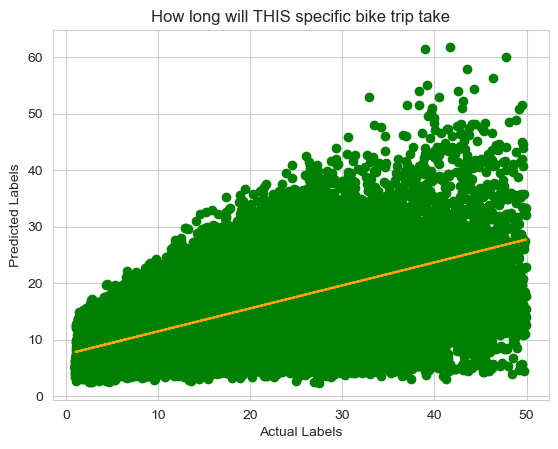

In [494]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(y_test , predictions, color='green')
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('How long will THIS specific bike trip take')

# overlay the regression line
t = np.polyfit(y_test , predictions, 1)
z = np.poly1d(t)
plt.plot(y_test,z(y_test), color='orange')
plt.show()

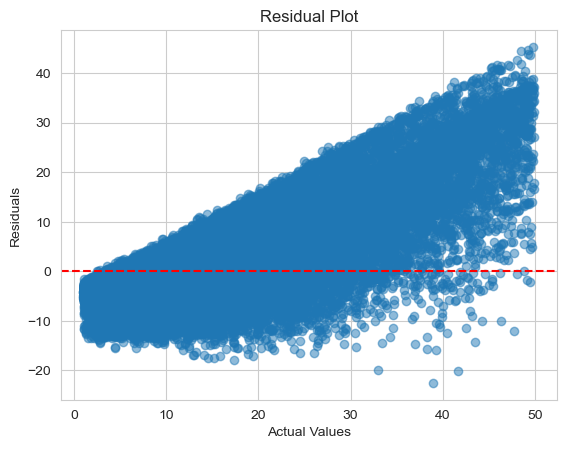

In [495]:

residuals = y_test - predictions
plt.scatter(y_test, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


## Checking Matrics 

In [496]:

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print("R²:", r2_score(y_test, predictions))
print("MAE:", mean_absolute_error(y_test, predictions))
print("RMSE:", np.sqrt(mean_squared_error(y_test, predictions)))

R²: 0.4082329518375175
MAE: 5.011913317789936
RMSE: 7.433349750550464


## Checking Cross-validaton

In [497]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=5)
print("Cross-validated R²:", scores)

Cross-validated R²: [0.38475736 0.40938448 0.42104551 0.42795505 0.36931501]
